# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision

<a id='probability'></a>
## Part I - Probability

.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [5]:
df['converted'].value_counts()/len(df.converted)*100

0    88.034081
1    11.965919
Name: converted, dtype: float64

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
len(df[(df.group=='treatment')& (df.landing_page!="new_page")])

1965

**f.** Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.query("group == 'control' & landing_page == 'old_page'")
df2 = df2.append(df.query("group == 'treatment' & landing_page == 'new_page'"))

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

**a.** How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.user_id.duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [12]:
df2[df2.user_id==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop(1899,inplace=True)

# Check again if the row with a duplicate user_id is deleted or not
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [14]:
df2.converted.mean()


0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control_converted_prob=df2.query("group=='control'")['converted'].mean()
control_converted_prob

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treat_converted_prob=df2.query("group=='treatment'")['converted'].mean()
treat_converted_prob

0.11880806551510564

In [17]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = control_converted_prob - treat_converted_prob
obs_diff

0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [18]:
(df2['landing_page'] == "new_page").mean()

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

> The control group led to 12.04% conversions and the treatment group led to 11.88% conversions. The difference between the conversion rates of control group and treatment group are about .15%. From this information we can see that the control group leads to slightly more conversions than the treatment group, but there is such a minimal difference between the two that its there is not an overwhelming bias from one to the other. 


<a id='ab_test'></a>
## Part II - A/B Test 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>## $H_0$: $P_{new}$ - $P_{old}$ <= 0
>## $H_1$: $P_{new}$ - $P_{old}$ > 0


### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
p_new=df2.converted.mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
p_old=df2.converted.mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [21]:
num_new=df2.query('group == "treatment"').shape[0]
num_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
num_old=df2.query('group == "control"').shape[0]
num_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [23]:
new_page_converted = np.random.choice([0,1], size=num_new ,p=[p_new,1 - p_new])
new_page_converted.mean()

0.88100612483655638

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
old_page_converted=np.random.choice([0, 1], size=num_old, p=[p_old,1 - p_old])
old_page_converted.mean()

0.88023321447747016

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
new_page_converted.mean() - old_page_converted.mean()\

0.00077291035908622074


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [26]:
# Sampling distribution 
p_diffs = []
for _ in range(10000):
    new_page_converted=np.random.choice([0,1], size=num_new ,p=[p_new,1 - p_new]) 
    new_page_converted_mean=new_page_converted.mean()
    old_page_converted=np.random.choice([0, 1], size=num_old, p=[p_old,1 - p_old])
    old_page_converted_mean=old_page_converted.mean()
    p_diffs.append(new_page_converted_mean - old_page_converted_mean)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

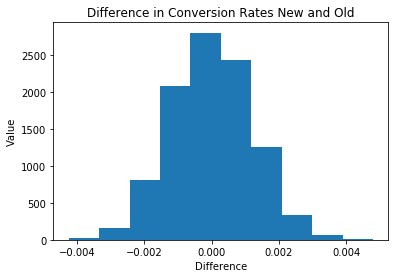

In [27]:
plt.hist(p_diffs)
plt.title('Difference in Conversion Rates New and Old')
plt.xlabel("Difference")
plt.ylabel("Value");

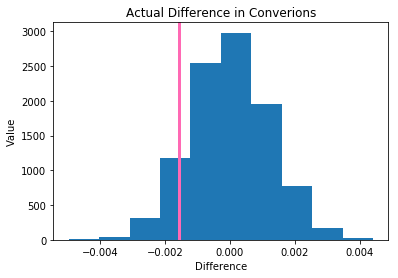

In [28]:
obs_diff = treat_converted_prob - control_converted_prob
null_vals = np.random.normal(0, np.std(p_diffs), 10000)
plt.hist(null_vals);
plt.axvline(x=obs_diff, color = 'hotpink', linewidth=3.0);
plt.title('Actual Difference in Converions')
plt.xlabel('Difference')
plt.ylabel('Value');


**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [29]:
(p_diffs>obs_diff).mean()

0.90529999999999999

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

> The p Value is what we calculated in section j.
> The type 1 error rate of 5% means that the p value would need to be .05 or less to reject the null hypothosis. Since the p value is .904 or roughly 90% the null hypothisis cannot be rejected and we cant say whether the new page has more conversions than the old page. 



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [31]:
import statsmodels.api as sm
convert_old =  df2.query('landing_page == "old_page" & converted == 1')['converted'].count()

convert_new =  df2.query('landing_page == "new_page" & converted == 1')['converted'].count()

n_old = num_old

n_new = num_new

convert_old, convert_new, num_old, num_new

(17489, 17264, 145274, 145310)

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
 

In [36]:
import statsmodels.api as sm
count_array=[convert_old, convert_new]
nobs_array=[n_old, n_new]
z_score, p_value = sm.stats.proportions_ztest(count_array, nobs_array, alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>The z score and p value agree with the findings from j and k. The p value is 0.0905 or roughly 90% again. This is greatly above the 5% type 1 error rate which means that it again fails to reject the null hypothesis so there is not evidence that the new page has more conversions than the old page. From running this test it makes sense for the company to stick with the old page.  


<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>Logistic regression should be performed. 

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [37]:
df2['intercept']=1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.tail()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0,1,1
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0,1,1
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0,1,1
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0,1,1
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0,1,1


In [38]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [39]:
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

Reference for result.summary2:  https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob

In [40]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-04-22 21:19 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

>The p value asssiciated with ab_page is .1899, this is also above the 5% type 1 error rate like before in Part II which means that it again fails to reject the null hypothesis again so there is not evidence that the new page has more conversions than the old page. Part II was one-sided where as Part III is two sided. In Part II the alternative hypothesis was the new page had higher conversions where Part III the alternative is saying the new page and old page have different conversion rates. 


**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> There are other things that can influince whether or not someone converts. I belive it is good to consider factors that is believed to influince our hypothesis. Considering more factors could improve model fit and potentially cause more accurate disisions. 
There are some disadvantages to this as well, adding too many factors could cause a simpson's paradox and could make the model less clear as well.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [41]:
df_countries=pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [42]:
df2_merged = df2.join(df_countries.set_index('user_id'), on='user_id')
df2_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US


In [43]:
df2_merged[['UK', 'US', 'CA']] = pd.get_dummies(df2_merged['country'])
df2_merged.drop('country', axis=1)
df2_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0,1


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [47]:
model_us = sm.Logit(df2_merged['converted'], df2_merged[['intercept', 'ab_page','US','UK','CA']])
us_result= model_us.fit()
us_result.summary2()

         Current function value: 0.366113
         Iterations: 35


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit             No. Iterations:    35.0000    
Dependent Variable:  converted         Pseudo R-squared:  0.000      
Date:                2023-04-22 21:21  AIC:               212781.1253
No. Observations:    290584            BIC:               212823.4439
Df Model:            3                 Log-Likelihood:    -1.0639e+05
Df Residuals:        290580            LL-Null:           -1.0639e+05
Converged:           0.0000            Scale:             1.0000     
---------------------------------------------------------------------
           Coef.    Std.Err.     z    P>|z|     [0.025       0.975]  
---------------------------------------------------------------------
intercept -1.4998 128575.5528 -0.0000 1.0000 -252004.9525 252001.9530
ab_page   -0.0149      0.0114 -1.3069 0.1912      -0.0374      0.0075
US        -0.4796 128575.5528 -0.0000 1.0000 -252003.9324 252002.9731
UK        -0.5303 128575.5528 -0.0000 1.0000 -252003.9831 252002.9225
CA        -0.4895 128575.5528 -0.0000 1.0000 -252003.9423 252002.9633
=====================================================================

"""

In [49]:
us_new = df2_merged['ab_page'] * df2_merged['US']
df2_merged['us_new'] = us_new

In [50]:
uk_new = df2_merged['ab_page'] * df2_merged['UK']
df2_merged['uk_new'] = uk_new

In [51]:
ca_new = df2_merged['ab_page'] * df2_merged['CA']
df2_merged['ca_new'] = ca_new

In [52]:
compare_model = sm.Logit(df2_merged['converted'], df2_merged[['intercept', 'us_new', 'uk_new', 'ca_new']])
results = compare_model.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-04-22 21:22 AIC:              212778.9383
No. Observations:   290584           BIC:              212821.2568
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
us_new        0.0074    0.0180     0.4098  0.6819  -0.0279   0.0427
uk_new       -0.0827    0.0380    -2.1763  0.0295  -0.1571  -0.0082
ca_new       -0.0183    0.0126    -1.4486  0.1475  -0.0430   0.0064
==================================================================

"""

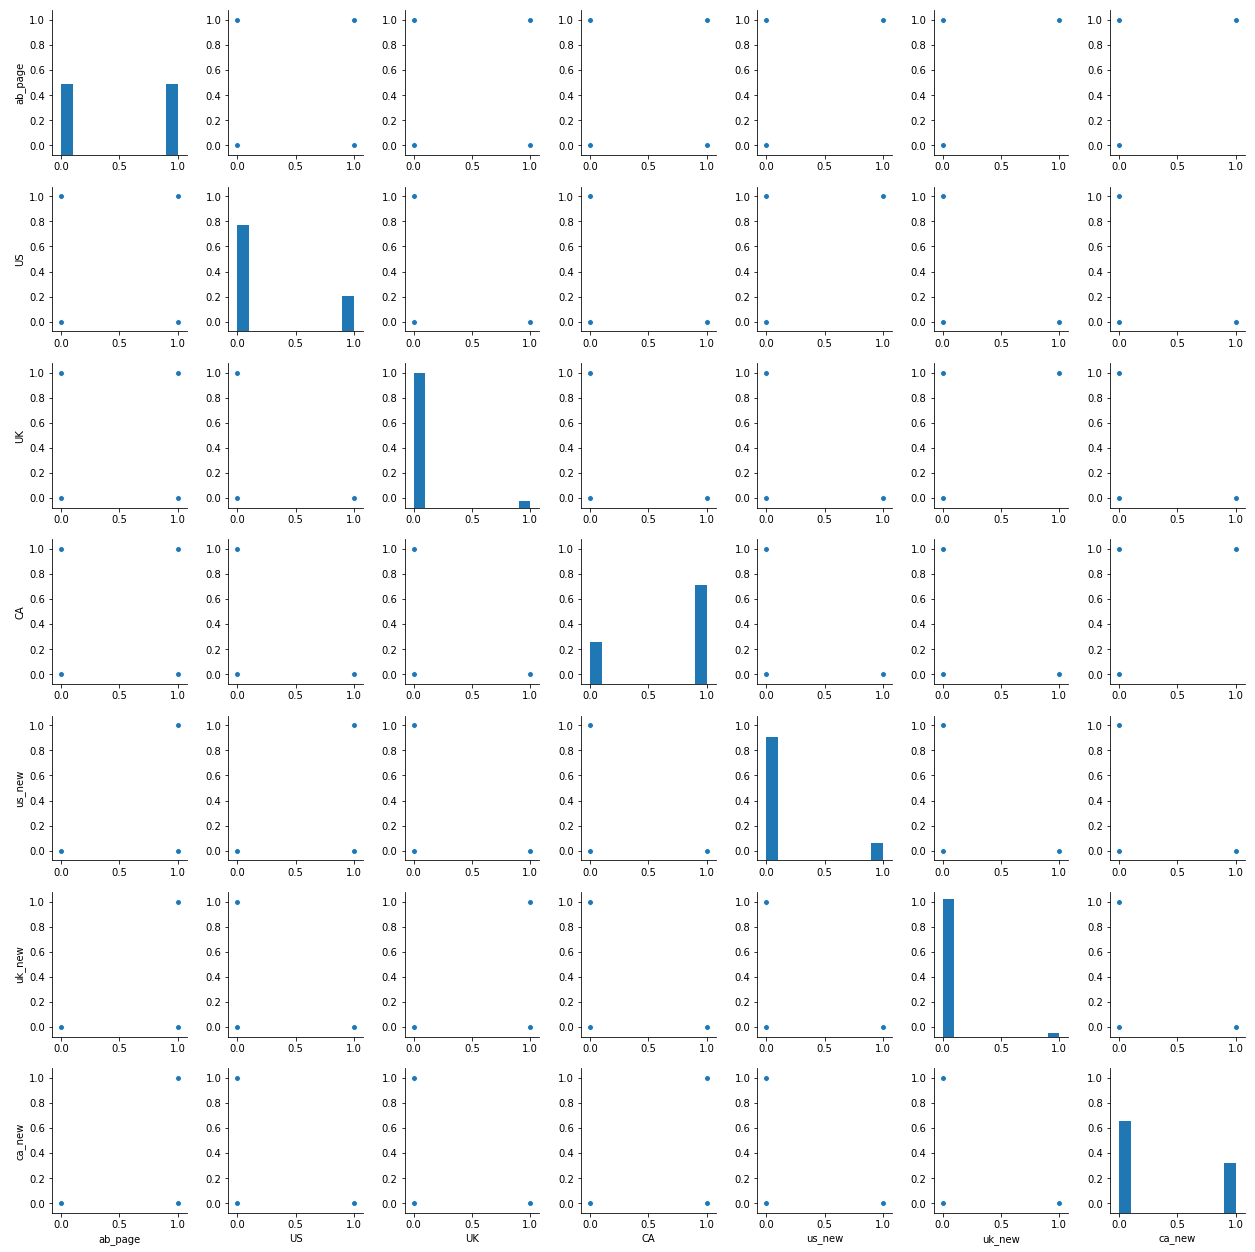

In [54]:
sns.pairplot(df2_merged[['ab_page', 'US','UK', 'CA','us_new', 'uk_new', 'ca_new']]);

> In conclusion through all of the tests we have done throughout this project we failed to reject the null hypothesis. There is not sufficient evidence that the new page will have better conversions than the old page, therefore it will be recomended to keep the old page. 


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0